In [1]:
scores = '../out/ko_scores_rep.txt'

In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

plt.rc('font', size=12)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
m = pd.read_table(scores, index_col=[3, 1, 0, 2, 5])

Batches reproducibility (biological replicates)
---

In [5]:
b1 = m.loc['B1']
b2 = m.loc['B2']

In [6]:
res = []
for c in {x[0]
          for x in b1.index}.intersection({x[0]
                                           for x in b2.index}):
    m1 = b1.loc[c]
    m2 = b2.loc[c]
    c1 = set(m1.index)
    c2 = set(m2.index)
    idx = sorted(c1.intersection(c2))
    a1 = m1.loc[idx]['score']
    a2 = m2.loc[idx]['score']
    if len(idx) > 10:
        r, p = stats.pearsonr(a1, a2)
        res.append((c, r, p))
r = pd.DataFrame(res,
                 columns=['condition',
                          'r', 'p'])

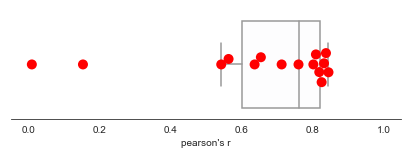

In [7]:
plt.figure(figsize=(7, 2))

sns.boxplot(data=r,
            x='r',
            color=sns.xkcd_rgb['pale grey'])
sns.swarmplot(data=r,
              x='r',
              size=10,
              color='r')
plt.xlim(-0.05, 1.05)
plt.xlabel('pearson\'s r')
sns.despine(left=True);

In [8]:
r.sort_values('r')

,condition,r,p
5,Anaerobic growth (48H),0.009532,4.626184e-01
10,Nystatin (48H),0.153501,2.193497e-32
8,DMSO 1% (48H),0.542892,0.000000e+00
0,Amphotericin B (48H),0.563539,0.000000e+00
2,SC + hepes (48H),0.636900,0.000000e+00
12,Sorbitol 1M (48H),0.654519,0.000000e+00
4,6-AU (48H),0.713007,0.000000e+00
7,39ºC (48H),0.760533,0.000000e+00
9,Glycerol 2% (72H),0.802362,0.000000e+00
3,Glycerol 2% (48H),0.809538,0.000000e+00


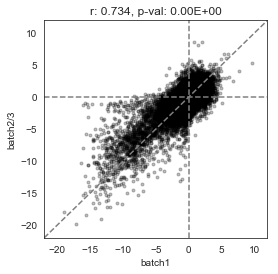

In [9]:
c1 = set(b1.index)
c2 = set(b2.index)
idx = sorted(c1.intersection(c2))
cdx = set(r[r['r'] >= 0.0]['condition'])
mdx = [x for x in idx
       if x[0] in cdx]
a1 = b1.loc[idx]['score']
a2 = b2.loc[idx]['score']
d1 = b1.loc[mdx]['score']
d2 = b2.loc[mdx]['score']

plt.figure(figsize=(4, 4))

plt.plot(d1,
         d2,
         'k.',
         alpha=0.25)
plt.plot([-22, 12],
         [-22, 12],
         '--',
         color='grey')

plt.xlim(-22, 12)
plt.ylim(-22, 12)

plt.axvline(0,
            color='grey',
            linestyle='dashed')
plt.axhline(0,
            color='grey',
            linestyle='dashed')

plt.xlabel('batch1')
plt.ylabel('batch2/3')

rv, p = stats.pearsonr(d1,
                       d2)

plt.title('r: %.3f, p-val: %.2E' % (rv, p));

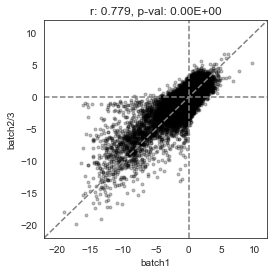

In [10]:
c1 = set(b1.index)
c2 = set(b2.index)
idx = sorted(c1.intersection(c2))
cdx = set(r[r['r'] >= 0.5]['condition'])
mdx = [x for x in idx
       if x[0] in cdx]
a1 = b1.loc[idx]['score']
a2 = b2.loc[idx]['score']
d1 = b1.loc[mdx]['score']
d2 = b2.loc[mdx]['score']

plt.figure(figsize=(4, 4))

plt.plot(d1,
         d2,
         'k.',
         alpha=0.25)
plt.plot([-22, 12],
         [-22, 12],
         '--',
         color='grey')

plt.xlim(-22, 12)
plt.ylim(-22, 12)

plt.axvline(0,
            color='grey',
            linestyle='dashed')
plt.axhline(0,
            color='grey',
            linestyle='dashed')

plt.xlabel('batch1')
plt.ylabel('batch2/3')

r, p = stats.pearsonr(d1,
                      d2)

plt.title('r: %.3f, p-val: %.2E' % (r, p));

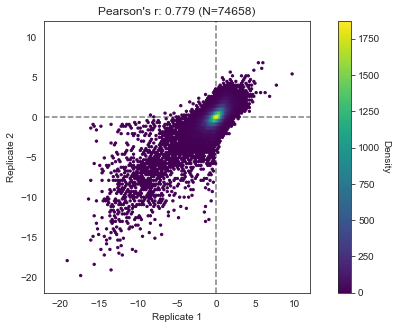

In [11]:
plt.figure(figsize=(5.5, 5))

gs = plt.GridSpec(1, 2, width_ratios=[4, 0.2])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

plt.sca(ax1)
hb = plt.hexbin(d1, d2, gridsize=100, cmap='viridis')

cbar = plt.colorbar(hb, cax=ax2)
cbar.set_label('Density', rotation=270, labelpad=10)

plt.draw()

counts = hb.get_array()
colors = hb.get_facecolors()
colors[:, 3] = counts > 0
hb.set_facecolors(colors)

plt.xlim(-22, 12)
plt.ylim(-22, 12)

plt.axvline(0,
            color='grey',
            linestyle='dashed',
            zorder=0)
plt.axhline(0,
            color='grey',
            linestyle='dashed',
            zorder=0)

plt.xlabel('Replicate 1')
plt.ylabel('Replicate 2')

rv, p = stats.pearsonr(d1,
                       d2)

plt.title('Pearson\'s r: %.3f (N=%d)' % (rv, d1.shape[0]))

plt.savefig('reproducibility.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('reproducibility.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);